In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from sklearn.linear_model import MultiTaskLassoCV
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import AlphaSelection
from yellowbrick.regressor.alphas import alphas




In [2]:
md = pd.read_excel(io='CCLE metabolomics dataset.xlsx',sheet_name="All")
mt = md.drop(['Tissue', 'Medium','Culture'], axis=1)
hm = pd.read_csv('GCP_proteomics_remapped.csv')
merge_tb = mt.merge(hm,how='inner',left_on='CCL', right_on='Cell Line')
MET = merge_tb.iloc[:,1:226]
GCP = merge_tb.iloc[:,227:269]

GCP = np.nan_to_num(GCP, nan=0)
MET = np.nan_to_num(MET, nan=0)
Xtrain, Xtest, Ytrain, Ytest =train_test_split(GCP, MET, test_size=0.3, random_state=0)
df_Xtrain = pd.DataFrame(Xtrain)
df_Ytrain = pd.DataFrame(Ytrain)
print(df_Xtrain)
print(df_Ytrain[0])

           0         1         2         3         4         5         6   \
0    0.024045  0.188199  0.675553  0.262296 -0.004142 -0.115229  0.084376   
1   -0.097078 -0.157050 -0.224470  0.069887 -0.666851 -0.274659  0.297153   
2   -0.013619  0.142626  0.808153  0.088745  0.323300 -0.194603 -0.181593   
3   -0.113688 -0.867921  0.262414 -0.515059 -0.715857 -0.489771  0.429724   
4    0.083515 -0.081834  0.252509  0.816542  0.162376  0.000064 -0.136875   
..        ...       ...       ...       ...       ...       ...       ...   
599  0.151816 -0.315067 -0.648378  0.193388  0.359878 -0.053571  0.250489   
600  0.104364  0.441337 -0.802840  0.000000 -0.074239 -0.069448  0.489005   
601 -0.062003  0.391046  0.830222  0.240985  0.415098 -0.286115 -0.503596   
602  0.026296  0.433020 -0.152342  0.000000  0.523850  0.187276 -0.151856   
603  0.189941  0.250454  0.351840  0.056213 -0.278875  0.217273  0.428281   

           7         8         9   ...        32        33        34  \
0  

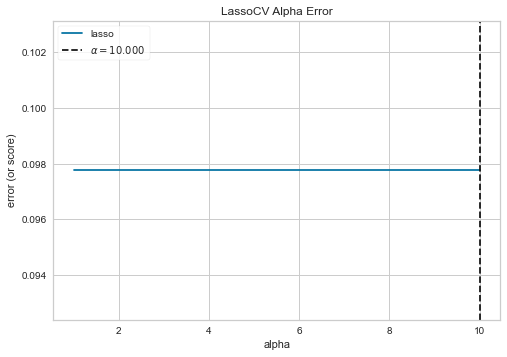

In [5]:
## GCP_to_MET

alphas = np.logspace(10**-6, 1, 10)
scores = np.empty_like(alphas)

model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(df_Xtrain,df_Ytrain[0])
visualizer.show()